# Classical statistical inference: Regression and model fitting

## Table of Content

- III. [Maximum Likelihood Estimation:](#III-Maximum-Likelihood-Estimation-(MLE)): A brief overview
    - III.1 [Likelihood](#III.1-Likelihood)
    - III.2 [Maximizing the likelihood](#III.2-Maximum-likelihood)
- IV. [Regression and Model fitting](#IV-Regression-and-model-fitting)
    - IV.1 [Regression for linear models](#IV.1-Regression-for-linear-models:)
        * [IV.1.1 Fitting a straight line](#IV.1.1-Fitting-a-straight-line)
        * [IV.1.2 General least square fit](#IV.1.2-General-least-square-fit)
        * [IV.1.3 Basis function regression](#IV.1.3-Basis-function-regression): *Topic not covered in 2019-2020.*

        * [IV.1.4 Multi Linear regression](#IV.1.4-Multi-Linear-regression): *Topic not covered in 2019-2020.*

    - IV.2 [Regularization and penalization of the likelihood](#IV.2-Regularization-and-penalization-of-the-likelihood): *Topic not covered in 2019-2020.*

        * [IV.2.1 Ridge regression:](#IV.2.1-Ridge-regression:): *Topic not covered in 2019-2020.*
        * [IV.2.2 LASSO regression:](#IV.2.2-LASSO-regression:): *Topic not covered in 2019-2020.*
        * [IV.2.3 How to fix $\lambda$ ?:](#IV.2.3-How-to-fix-$\lambda$-?:): *Topic not covered in 2019-2020.*
    - IV.3 [Regression for non linear models](#IV.3-Regression-for-non-linear-models:)
- XX. [References and supplementary material](#X)

In [1]:
import scipy.stats
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## III Maximum Likelihood Estimation (MLE)

We've seen that in frequentist inference, deriving information about a parameter $\theta$ consists in finding a point estimate $\hat{\theta}$ of this parameter and possibly drawing confidence intervals for $\theta$. To ensure that those estimators are the *best* possible estimator, frequentists generally follow a method called Maximum Likelihood analysis. We'll summarize the main ideas behind this approach hereafter. The interested reader may consult the notebook [MLE.ipynb](MLE.ipynb) (and ref. therein) for a more in-depth understanding. 

The first thing to do in that approach is to choose a model $M(\theta)$ that is supposed to describe the underlying population from which the data are drawn. This allows one to calculate a likelihood and find which values of the parameters maximize it, as explained below. 

### III.1 Likelihood


The Likelihood $L$ of a model and of its parameters is defined as $L~=~p(D \,|\,M(\boldsymbol{\theta}))$. Hence, this is the probability of Data given a model (in fact, given a model and its associated set of parameters). 
When we talk about the likelihoods of different models we are in general talking about the likelihoods of different sets of parameter values. 

It is important to note that a likelihood is not strictly speaking a probability as the sum of all the possible outcomes of a model must sum up to one, while the sum of the likelihood of the models (parameters) needed to explain the data do not have to add up to 1. 

Let's calculate the likelihood for specific case. Let's imagine that we have an ensemble of $N$ *independent* random variable {$x_i$} drawn from a normal (i.e. gaussian) distribution $N(\mu, \sigma)$, i.e. gaussian of mean $\mu$ and width $\sigma$ (i.e. errors on all the measurements $x_i$ are the same, namely the errors are "homoscedastic"). 

We know that the probability of a given measurement $x_k$ is:

$$
p(x_k \, | \, \mu, \sigma ) = \frac{1}{\sigma \sqrt{2\,\pi}} \, \exp\left[-0.5 \left (\frac{x_k - \mu}{\sigma} \right)^2\right] 
$$

If each measurement is independent of the other, the probability of having a given set of measurements will be proportional to the product of the individual probabilities. The likelihood can then be calculated as:

$$
L \equiv p(\{x_i\} | \mu, \sigma ) = \prod_{i=1}^{N} \frac{1}{\sigma \sqrt{2\,\pi}} \, \exp\left[-0.5 \left (\frac{x_i - \mu}{\sigma} \right)^2\right] = \frac{1}{\sigma^n (2\,\pi)^{n/2}} \prod_{i=1}^{N} \exp \left (\frac{-(x_i - \mu)^2}{2\, \sigma^2} \right)
$$

Note that this can be re-written:

$$
L \equiv p(\{x_i\} | \mu, \sigma ) = \frac{1}{\sigma^n (2\,\pi)^{n/2}} \exp \left ( \sum_{i=1}^N \frac{-(x_i - \mu)^2}{2\, \sigma^2} \right)
$$

If the errors are different for each random variable, then the likelihood becomes (see [MLE.ipynb](MLE.ipynb)):

$$
L =  \frac{1}{(2\,\pi)^{n/2}} \prod_{i=1}^{N} \frac{1}{\sigma_i} \exp \left (\frac{(x_i - \mu)^2}{2\, \sigma_i^2} \right)
$$

Because the likelihood becomes quickly small, one generally considers its logarithm. Taking the $\log$, we therefore have :

$$
\ln(L) =  -\frac{N}{2}\,\ln(2\pi) - \sum_i \ln(\sigma_i)  - \sum_{i=1}^N \frac{(x_i \,- \, \mu)^2}{2\,\sigma_i^2}, 
$$

### III.2 Maximum likelihood 

The maximum likelihood approach consists in reading the likelihood in a different way than usual.    

Let's first realise that, at first sight, you may consider the likelihood as being a function of your data. Ineed, if you make a measurement of a random variable and obtain a value $x$, the associated likelihood $L$ can be considered as a function of the data because the value of the likelihood you calculate depends on the data you have obtained. One may however turn this around. You have a set of data in hand, and may wonder: what should be the values of the parameters entering into the likelihood (i.e. in the gaussian case above, $\mu$ and $\sigma$) such that the likelihood is maximum (it is natural to think that your data have nothing peculiar). This means that you effectively reads the likelihoo as a function of the model parameters. 

To summarize, the idea behind the **maximum likelihood estimation (MLE)** is two fold: i) the probability of any given set of parameters $\boldsymbol{\theta}$ is proportional to the probability of observing the data (i.e. the likelihood defined above); ii) the most probable set of values of the parameters (of our model) should also be the one that maximizes the probability of obtaining the data. 

You know how to find the extrema of a function: by searching for which values of their variables (here the parameters of the model), its derivative is equal to 0. Because the likelihood can quickly become very small, one calculates its logarithm and search the maximum of $\ln{L}$.  The maximum of $\ln{L}$ (varying the "parameters" $\theta$) is obtained by searching the parameters $\theta$ that yield:

$$
\left. \frac{{\rm d}\ln(L(\theta_i))}{\rm{d}\theta_i}\right\vert_{\hat {\theta}_i} \equiv 0
$$

One can show, e.g. for the gaussian case, that the estimator of the mean $\hat{\mu} = \sum{x_i}/n$ is effectively a maximum likelihood estimator of the mean. The interested reader will find the proof in [Sect. III.2 of MLE.ipynb](MLE.ipynb#III.2--Maximum-Likelihood-Estimation-(MLE)). 

## IV Regression and model fitting

Having in hands a set of mutidimensional data, let's say an independent variable $x$, and dependent variable $y$. Then the problem of regression consists in finding the expectation value (another word to say the arithmetic *mean*) of $y$ given x, i.e. $E(y|x)$ (i.e. this is a conditional expectation value). This is bread and butter of scientific research. If we have a model for the conditional distribution, we can write $y \, = \, f(x\,|\,{\boldsymbol{\theta}})$ where ${{\boldsymbol{\theta}}}$ are the parameters of the model. Regression will then consists in finding the parameters $\boldsymbol{\theta}$ that yields $E(f(x\,|\,\boldsymbol{\theta}))$. Note here that $x$, the independent variable, does not have to be a random variable, it could be a deterministic variable, such as a deterministic sampling of a time series. 


The way you will deal with regression depends of the chacteristics of your problem:
- *Linearity*: Is the model linear *in its parameters*, i.e. $f(x\,|\,{\boldsymbol{\theta}}) = \sum_{p=1}^{k} \, \theta_p g_p(x)$, where $g_p(x)$ can be a non linear function of $x$ BUT does not depend on any of the free parameters. 
- *Complexity*: A large number of independent variables increases the complexity of the error covariance matrix and of the problem solving. For linear models with small/negligible errors on the independent variable, problem complexity is not a severe issue. 
- *Error behaviour*: The uncertainties on the dependent and independent variables, and their correlation, generally govern the choice of the regression method. Several situation can occur:
    1. Dependent and independent variable have negligible errors
    2. Dependent variable $y$ has significant homoscedastic Gaussian error, $x$ has negligible errors. 
    3. Dependent variable $y$ has significant heteroscedastic Gaussian error, $x$ has negligible errors. 
    4. Dependent variable $y$ has non Gaussian errors, but their behaviour is known. 
    5. Dependent variable $y$ has non Gaussian errors, but their behaviour is unknown
    6. Errors on the independent variable $x$ are unknown, but the full covariance matrix can be treated as Gaussian. 
    7. All variables have non gaussian errors. 
    
        - Case 1, 2, 3, 4 ->  easily solvable with frequentist or Bayesian techniques.
        - Case 5 -> 7 are more easily solvable with Bayesian techniques. 

### IV.1 Regression for linear models:

The problem is the following: we have n data points $y_i$ with associated errors $\sigma_i$, and a model $f(x_i \, | \, \boldsymbol{\theta})$ that makes prediction for the values of our data points, i.e. $ f(x_i \, | \, \boldsymbol{\theta}) = y_{i, \rm{mod}}$. Then, the standard frequentist approach consists in defining a *merit function*:

$$
\chi^2 \equiv \sum_{i=1}^{n} \frac{(y_i - y_{i, mod})^2}{\sigma_i^2}
$$

and finding the parameters $\boldsymbol{\theta}$ that minimize that function. Minimizing this function means that we modify the parameter to minimize the square of the vertical (weighted) distance between the data point and the model (numerator of the above expression). This minimization however accounts for the uncertainty on each data point through a weighting factor inversely proportional to the uncertainty on that point (i.e. $1/\sigma^2_i$). This ensures that the points with the largest uncertainty contribute less to the process than those that are known more precisely. When there is no weight, one speaks of *least square* regression. When the uncertainty on the individual data points is considered (as above), one speaks of *chi square* ($\chi^2$) regression.

![least square](../Figures/fig_least_square.png)

Minimizing the $\chi^2$ is equivalent to find the line that go through all the blue points and which is such that the red vertical line is the shortest for each of the point. 

If the errors between data points are correlated, we need to introduce a covariance matrix, $[C]$ and its inverse, ($[F] \equiv [C]^{-1}$ , or Fisher matrix) is defined as :

$$
C_{i,l} \equiv cov(y_i, y_l). 
$$

I.e., for two data points $y_k, y_l$ we have: 

$$
[F]^{-1} \, = \, [C] \, = \, \left[ \begin{array}{ccc}
\sigma^2_k & \sigma_{kl} \\
\sigma_{kl} & \sigma^2_l \\
 \end{array} \right]   
$$

Since $[C]$ and $[F]$ are symmetric, the $\chi^2$ can be written:

$$
\chi^2 = \sum_{i=1}^{n} \sum_{l=1}^{n}  (y_i - y_{i, mod}) F_{i,l} \, (y_l - y_{l, mod}). 
$$

You can easily verify that this expressions resumes to the original definition when errors are uncorrelated. 

Now that we have drawn the general picture, let's study in more details some of the specific classes of problems outlined above. 

#### IV.1.1 Fitting a straight line

*Minimizing the value* of the $\chi^2$(through a change of the parameters $\theta$ of the model) is effectively equivalent to a *maximization of the likelihood*. Let's see it in the context of the fit of a straight line. 

If $x$ is our independent variable, and $y$ the dependent variable, we have:

$$
y_i = \theta_0 + \theta_1 \, x_i + \epsilon_i,
$$

where $\theta_0$ and $\theta_1$ are the parameters we want to estimate (i.e. intercept and slope of the line), and $\epsilon_i$ is an additive noise term (namely the uncertainty on $y_i$), that we assume to follow a normal distribution, i.e. $\epsilon_i \sim  N(0, \sigma_i)$. By the way, we should take the habit to speak of uncertainties rather of errors as the uncertainty on the data points simply results from a random process, hence there is no single value you can access to by making your measurement, while error suggests that you are doing a mistake in making your measurements.

As we have seen [in Sect. III.1](#III.1-Likelihood), if the errors $\sigma_i$ on $y_i$ are Gaussian, the likelihood can be written: 

$$
L \, \equiv \, p(\{y_i\} \, | \, \{x_i\}, {\boldsymbol{\theta}} ) =  \prod_{i=1}^{N} \frac{1}{\sigma_i \sqrt{2\,\pi}} \, \exp\left[\left (\frac{ -(y_i - (\theta_0+\theta_1\,x_i))^2}{2\,\sigma_i^2} \right)\right]
$$

Or, written in terms of log-likelihood:

$$
\ln(L) \, \propto \sum_{i=1}^{N} \left (\frac{ -(y_i - (\theta_0+\theta_1\,x_i))^2}{2\,\sigma_i^2} \right) 
$$

Hence, maximizing the log-likelihood as a function of the model parameters $\boldsymbol{\theta}$ in this case, is equivalent to minimizing the (weighted) sum of the square errors $\epsilon_i$. 

We also see that the likelihood can be written as $L \propto \exp(-\chi^2/2)$ (**THIS IS IMPORTANT TO KEEP IN MIND**).   

**Note**: We will see that Bayesians reach the same conclusion when assuming a flat/uninformative prior on $\boldsymbol{\theta}$.  

In case of Gaussian homoscedastic uncertainties, you can explicitly derive the values of $\theta_0, \theta_1$ and the standard error on the parameters $\sigma^2_{\theta_1} , \sigma^2_{\theta_2}$. 
For this purpose, you need to solve two equations with two unknowns:
$$
\frac{\partial \ln(L)}{\partial \theta_0} = 0 \\
\frac{\partial \ln(L)}{\partial \theta_1} = 0
$$

while the errors on the *parameters* can be derived from the error propagation formula. 

You end up finding that: 

$$
\theta_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x} \bar{y}} {\sum_{i=1}^N (x_i - \bar{x})^2 } \\
\theta_0 = \bar{y} - \theta_1{\bar{x}}
$$

#### Heteroscedastic error and matrix formalism

For heteroscedastic errors, and even more general regression function, one rather uses a more compact matrix notation.

Our problem consists in finding a solution for: 
$$
y_0 = \theta_0 + \theta_1 \, x_0 + \epsilon_0 \\
y_1 = \theta_0 + \theta_1 \, x_1 + \epsilon_1 \\
... \\
y_{N-1} = \theta_0 + \theta_1 \, x_{N-1} + \epsilon_{N-1}
$$

We can therefore define $M$ (called design matrix) such that $Y = M\,\boldsymbol{\theta} + E$, where $Y$ is a $N$ dimensional vector containing our $y_i$ (i.e. our $N$ points $y_i$):

$$
Y =  \left[ \begin{array}{c}
y_0 \\ y_1  \\ ... \\ y_{N-1} 
 \end{array} \right]   
$$

For our straight line regression, $\boldsymbol{\theta}$ is a vector containing our 2 parameters:

$$
\boldsymbol{\theta} =  \left[ \begin{array}{c}
\theta_0 \\ \theta_1  
 \end{array} \right] ,
$$

$M$ is a $2 \times N$ matrix:

$$
M =  \left[ \begin{array}{cc}
1 & x_0 \\ 1 & x_1  \\ ... \\ 1 & x_{N-1} 
 \end{array} \right], 
$$

where the constant values in the first columns correspond to the constant value $\theta_0$ in our regression. 

And finally, $E$ is 
$$
E =  \left[ \begin{array}{c}
\epsilon_0 \\ \epsilon_1  \\ ... \\ \epsilon_{N-1}  
 \end{array} \right]   
$$

The $\epsilon_i$ are distributed as $N(0, \sigma_i)$, such that the associated $N\times N$ covariance matrix $C$ is:

$$
C =  
 \left[ \begin{array}{cccc}
\sigma_0^2 & 0 & ... & 0 \\ 
0 & \sigma_1^1 & ... & 0 \\ 
... & ... & ... & ... \\
0 & 0 & ... & \sigma_{N-1}^2   
 \end{array} \right] 
$$

Then the $\chi^2$, i.e. the weighted sum of the square errors 
$$
\chi^2 \equiv \sum_i \frac{(y_i - (\theta_0+\theta_1\,x_i))^2}{\sigma_i^2}, 
$$
gets written with matrix representation: 
$$
S = (Y - \boldsymbol{\theta} M)^T C^{-1} (Y-\boldsymbol{\theta} M).
$$ 

Similarly to the homoscedastic case, the maximum likelihood solution for this regression is:

$$
\boldsymbol{\theta} = (M^T C^{-1} M)^{-1} \, (M^T C^{-1} Y),
$$

The uncertainties on the regression coefficients $\boldsymbol{\theta}$ are then expressed as the symmetric (covariance) matrix:

$$
\Sigma_\theta = \left[ \begin{array}{cc}
\sigma_{\theta_0}^2 & \sigma_{\theta_0 \theta_1}  \\ 
\sigma_{\theta_0 \theta_1} & \sigma_{\theta_1}^2 \\ 
 \end{array} \right] = [M^T C^{-1} M]^{-1}
$$


=> **Finding the best parameters of the model is done through simple algebra and implies simply matrix multiplications and inversion**

#### Python implementation:

If you simply want to make a linear regression for a data set $y(x)$, you can use in `scipy.stats` the method `linregress` (i.e. `from scipy.stats import linregress`) but this routine is a simple least-square (the errors are assumed to be identical for all the data points).    
The alternative is to use `numpy.polyfit(x, y, deg=1, w=1/sigma)`, where $x,y$ are your data, $w$ is the weight associated to the data and `deg=1` is there to fit a model of degree =1. 

#### Example: 

The file `SNdata.txt` contains distance modulus generated for a simulated sample of supernovae (derived following Sect. 8.1.1 of our [book](#book)). The distance modulus is given by:

$$
\mu(z) = -5 \, \log \left( (1+z) \frac{c}{H_0} \int \frac{{\rm d} z}{(\Omega_m (1+z)^3 + \Omega_\Lambda)^{1/2} }  \right)
$$

This model is clearly non linear, and the error bars are heteroscedastic Gaussian noise that increases with the supernova redshift. Clearly this won't be well represented with a linear model, but we will keep this example all along (in this lecture and in the upcoming ones) to see how various regression techniques help in fitting those data sets.

The file contains 3 columns: 1- The Supernova redshift ; 2- Its distance modulus $\mu(z)$ (calculated based on some cosmological parameters), and 3- The uncertainty $\sigma_\mu$ on the distance modulus.
We will now read that file and perform a linear regression on the data. We know that this will not work well, but this does not preclude trying this linear model to see how it performs. 


In [40]:
# Reading the data and filling data arrays
data = np.loadtxt('SNdata.txt')
x_data, y_data, sigma = data[:,0], data[:,1], data[:,2]
x_data = x_data 
wght = 1./sigma

In [41]:
# MLE regression of a linear model (deg=1)
p_model, cov = np.polyfit(x_data, y_data, deg=1, w=wght, cov=True)
xarr = np.linspace(x_data.min(), x_data.max()+0.1, 100)
y_model = p_model[1] + p_model[0]*xarr    
y_predict = p_model[1] + p_model[0]*x_data   

print('Fitted coefficients: slope = %.3f, intercept= %.3f' %(p_model[0], p_model[1]))

Fitted coefficients: slope = 4.623, intercept= 39.687


Text(0, 0.5, '$\\mu(z)$')

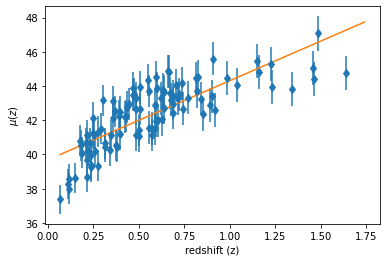

In [42]:
# Showing the results
plt.errorbar(x_data, y_data, yerr=sigma, ls='', marker='d')
plt.plot(xarr, y_model)         # Calculate y for the sorted x array
plt.xlabel('redshift (z)')
plt.ylabel(r'$\mu(z)$')

In [5]:
# Calculating the chi^2
chi2 = np.sum(( (y_data-y_predict)/sigma)**2) 
print('chi^2 = %.2f , for %i dof, namely a reduced chi2= %.2f' %(chi2, len(x_data)-2, chi2/(len(x_data)-2)) )
print('Covariance matrix : \n', cov )

chi^2 = 153.57 , for 98 dof, namely a reduced chi2= 1.57
Covariance matrix : 
 [[ 0.12923568 -0.07061019]
 [-0.07061019  0.0524617 ]]


#### Quality of the linear regression:

We know that if we repeat the observations a large number of times, the $\chi^2$ should get distributed following a $\chi^2$ distribution. If $Q = \sum_{i=1}^{N} z_i^2$ is the sum of the squared residuals, the $\chi^2$ distribution, with $k = N$ degrees of freedom can be written:      
$$
p(Q/k) = \frac{1} {(2\,\Gamma(k/2))}  (Q/2)^{k/2-1}  \exp(-Q/2)
$$

We know that the expectation value in that case is $k$ and the standard deviation $\sigma = \sqrt{2k}$. Hence, $E(\chi^2) = N-n_{\rm {param}}$. For the linear fit above, we have 98 dof and hence we expect our $\chi^2$ to be within some fraction of $\sigma = \sqrt{2*98} \sim 14 $ from 98. 


Because we know that the $\chi^2$ follows a chi-2 distribution, we can use the CDF of the chi2 distribution to make a statistical statement about the value of the $\chi^2$ that we have obtained, i.e. what is the probability of getting a  value of $\chi^2$ larger or equal to the one we have obtained. If we write $x$ the value we obtain and $X$ the random variable for which we know the distribution, it means we search to find $p(X \leq x)$. Remember that from the CDF, we have  can $p(x \leq X)$, so this p-value is simply 1-CDF. This p-value is not only used in the context of $\chi^2$ but in the general context of hypothesis testing. 

If the p-value is small (typically < 0.05), it means that it is unlikely to get such a large value of the $\chi^2$. On the contrary, if it is too close to 1, it is also suspicious. It means that the derived $\chi^2$ is very low and probably much lower than what you would have obtained for a random sample. In both cases, the interpretation strongly relies on the uncertainty $\sigma$ on your data point. If $\sigma$ is **over-estimated**, your $\chi^2$ will be too small (and p-value close to 1). Conversely, if the uncertainties are **under-estimated**, your $\chi^2$ will be too large (and p-value $< 0.05$). 

In [6]:
1-scipy.stats.chi2.cdf(chi2, df= len(x_data)-2) # Using the cdf (1-p(x < x_i))

0.0002864513207404551

Text(0.5, 1.0, 'CDF (chi2 distribution)')

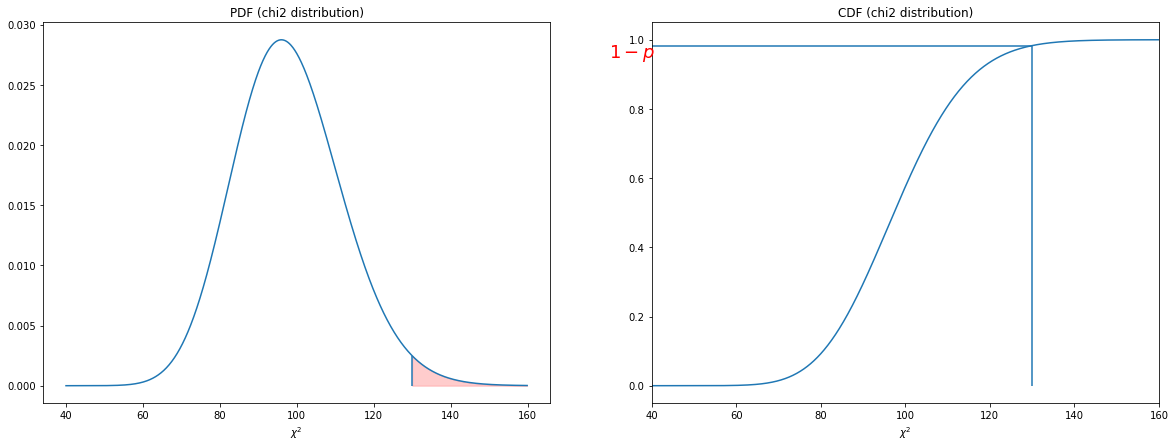

In [7]:
# Illustration of the p-value for a chi2 = 130
chi2 = 130.  # FOR THE SAKE of illustration 
X = np.arange(len(x_data)-60, len(x_data)+60, 0.1)
pdf_chi = scipy.stats.chi2.pdf(X, df= len(x_data)-2)
cdf_chi = scipy.stats.chi2.cdf(X, df= len(x_data)-2)
f, ax = plt.subplots(ncols=2, figsize=(20, 7))
ax[0].plot(X, pdf_chi)
ax[0].set_xlabel(r'$\chi^2$')
ax[1].plot(X, cdf_chi)
ax[1].set_xlabel(r'$\chi^2$')
idchi2 = np.searchsorted(X, chi2)   # Search the id of our chi2 in X
ax[0].vlines(chi2, 0, pdf_chi[idchi2]) 
ax[1].vlines(chi2, 0, cdf_chi[idchi2]) 
ax[0].fill_between(X[idchi2::], 0, pdf_chi[idchi2::], color='red', alpha=0.2)
pval = 1-scipy.stats.chi2.cdf(chi2, df= len(x_data)-2)
ax[1].hlines(cdf_chi[idchi2], 40, chi2) 
ax[1].set_xlim(40, 160)
#ax[1].annotate(r'$1-p$', (40, 0.9), fontsize=18.)
ax[1].text(30, 0.95, r'$1-p$', fontsize=18., color='red')
ax[0].set_title('PDF (chi2 distribution)')
ax[1].set_title('CDF (chi2 distribution)')

For illustration, we have changed the $\chi^2$ value of the fit to 130. The p-value correspond to the probability to have a $\chi^2$ at least as large as 140, this is therefore the red area of the left figure. The CDF for $\chi^2 = 130$ corresponds to $1-p$.  

In [8]:
# p value of the fit for chi2= 130
pval = 1-scipy.stats.chi2.cdf(130, df= len(x_data)-2)
pval

0.016912939591529397

##### Exercise: 

Let's assume the following fake data set:
``` python 
a, b = 0.3, 0
xdata = np.arange(0., 6., 0.05)
sigma = np.zeros_like(xdata)+0.1  # homoscedastic errors
ydata = b + a * xdata + sigma * np.random.randn(len(xdata))
```
- Fit a straight line to those data
- Estimate the quality of the fit. Is it reasonable ? 
- Re-do the fit using wrong error bars (you can simply give an over/underestimated $\sigma$ when calculating the goodness of of fit). Try e.g. overestimate of the error bars by a factor 0.75, 0.9, 1.2, 1.5. Is the new $\chi^2$ plausible ? What can you say regarding the P-value associated to the $\chi^2$ found ?  

In [75]:
# Creating a fake data set 
a, b = 0.3, 0
x_data = np.arange(0., 6., 0.05)
sigma = np.zeros_like(x_data)+0.1  # homoscedastic errors
epsilon_noise = np.random.randn(len(x_data))   # noise drawn from N(0,1)
y_data = b + a * x_data + sigma * epsilon_noise
wght = 1./sigma

In [76]:
p_model, cov = np.polyfit(x_data, y_data, deg=1, w=wght, cov=True)   # Regression function
xarr = np.linspace(x_data.min(), x_data.max()+0.1, 100)
y_model = p_model[1] + p_model[0]*xarr    # Model prediction on a regular grid
y_predict = p_model[1] + p_model[0]*x_data    # Model prediction at for the same x as the data

print('Fitted coefficients: slope = %.3f, intercept= %.3f' %(p_model[0], p_model[1]))  # Print results of the fit 

Fitted coefficients: slope = 0.296, intercept= 0.002


chi^2 = 98.24 , for 98 dof 
P-value : 4.74e-01


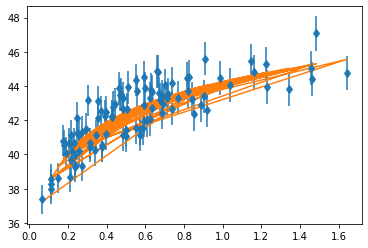

In [74]:
# Plot the results 
plt.errorbar(x_data, y_data, yerr=sigma, ls='', marker='d')   
plt.plot(x_data, y_predict)

# Calculate the chi2 and p-value and print the result on the screen 
chi2 = np.sum(( (y_data-y_predict)/sigma)**2)     #chi2
nu = len(x_data)-2                # degrees of freedom
print('chi^2 = %.2f , for %i dof ' %(chi2, nu) )
print('P-value : %.2e'% (1-scipy.stats.chi2.cdf(chi2, df= len(x_data)-2)) ) # Using the cdf (1-p(x < x_i))

In [12]:
# What if we had overestimated the error bar sigma by a factor 0.75, 0.9, 1.2, 1.5
# Print chi2 
for f in [0.75, 0.9, 1.2, 1.5]:
    chi2 = np.sum( ( (y_data-y_predict) / (f*sigma) )**2 )  
    pval = 1-scipy.stats.chi2.cdf(chi2, df= nu)
    print('f = %.2f: chi^2 = %.2f , for %i dof ' %(f, chi2, nu))
    print('P-value = %.3e' %pval)
    print('***********************************************')

f = 0.75: chi^2 = 187.98 , for 118 dof 
P-value = 4.451e-05
***********************************************
f = 0.90: chi^2 = 130.54 , for 118 dof 
P-value = 2.027e-01
***********************************************
f = 1.20: chi^2 = 73.43 , for 118 dof 
P-value = 9.996e-01
***********************************************
f = 1.50: chi^2 = 46.99 , for 118 dof 
P-value = 1.000e+00
***********************************************


#### IV.1.2 General least-square fit

A generalisation of the case discussed in IV.1.1 is by considering that we have linear combination of any $K$ function of $x$. This could for example be a polynomial of order $K$: 

$$
y_i = \theta_0 + \theta_1\,x_i + \theta_2\, x_i^2 + ... + \theta_K \, x_i^K + \epsilon_i
$$

Either our model is truely polynomial, or is the result of the Taylor expansion of a non linear model. 

The formula derived for the linear model are still valid but we now need to replace the design matrix M by:
$$
M =  \left[ \begin{array}{cccc}
1 & x_0 & x_0^2 & ... & x_0^K\\ 
1 & x_1 & x_1^2 & ... & x_1^K \\ 
... \\ 
1 & x_{N-1} & x_{N-1}^2 & ... & x_{N-1}^K
 \end{array} \right], 
$$

If we fit a polynomial of order $p$ to data sets of $k$ dimensions, the number of parameters is given by:
$$
m = \frac{(p+k)!}{p!k!},
$$

and the number of degrees of freedom $\nu = N-m$. For our typical 1D case, we have $m = p+1$, where p is the order of the polynomial, but if you increase the number of dimensions, the number of parameters increases exponentially with the order p (as seen in the above expression of $m$).

For the fit we can make use of `np.polyfit()`:

In [13]:
# Using np.polyfit()

data = np.loadtxt('SNdata.txt')
x_data, y_data, sigma = data[:,0], data[:,1], data[:,2]
x_data = x_data 
wght = 1./sigma
deg=4
p_model, cov = np.polyfit(x_data, y_data, deg=deg, w=wght, cov=True)

xarr = np.linspace(x_data.min(), x_data.max()+0.1, 100)

p = np.poly1d(p_model)              # This is a convenience function to build 1d polynomial ! Let's use it ! 
y_model = p(xarr)
y_predict = p(x_data)

print('Fitted coefficients: ', p_model)

Fitted coefficients:  [ -7.10642177  28.05365322 -40.36861874  27.70828185  35.79938077]


Text(0, 0.5, '$\\mu(z)$')

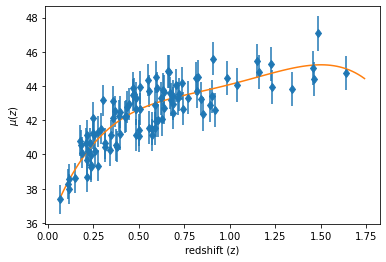

In [14]:
plt.errorbar(x_data, y_data, yerr=sigma, ls='', marker='d')
plt.plot(xarr, y_model)         
plt.xlabel('redshift (z)')
plt.ylabel(r'$\mu(z)$')

In [15]:
chi2 = np.sum(( (y_data-y_predict)/sigma)**2) 
p_value = 1-scipy.stats.chi2.cdf(chi2, df= len(x_data)-(deg+1)) 
print('chi^2 = %.2f , for %i dof, namely a reduced chi2= %.2f' %(chi2, len(x_data)-(deg+1), chi2/(len(x_data)-(deg+1))) )
print('p_value %.3e' % p_value )
print('Covariance matrix : \n', cov )

chi^2 = 96.94 , for 95 dof, namely a reduced chi2= 1.02
p_value 4.254e-01
Covariance matrix : 
 [[  15.16363928  -48.79502195   51.29259672  -19.96714492    2.25210216]
 [ -48.79502195  159.89706213 -171.80753463   68.50481102   -7.9181646 ]
 [  51.29259672 -171.80753463  189.74550192  -78.10456667    9.34991014]
 [ -19.96714492   68.50481102  -78.10456667   33.51656329   -4.23270121]
 [   2.25210216   -7.9181646     9.34991014   -4.23270121    0.58661851]]


#### IV.1.3 Basis function regression

*This section is provided only for completeness. Topic not covered in 2019-2020.*

The polynomial fit can be generalized to a fit of linear combination of basis functions, i.e. one can replace any row of the design matrix with any series of linear or non-linear functions of $x_i$. In other words, we replace:
$$
y_i = \theta_0 + \theta_1\,x_i + \theta_2\, x_i^2 + ... + \theta_K \, x_i^K + \epsilon_i
$$
by 
$$
y_i = \theta_0 + \theta_1\,B_1(x_i) + \theta_2\, B_2(x_i) + ... + \theta_K \, B_k(x_i) + \epsilon_i
$$

where $B_k(x_i)$ is an arbitrary basis function of our independent variable. 

As we are fitting only for coefficients multiplying these rows, the problem remains linear. Examples of such basis functions are "splines" and "Gaussian" basis function. 

Fitting basis functions can be done with the routine `BasisFunctionRegression` in `astroML.linear_model`. 

#### IV.1.4 Multi-Linear regression

*This section is provided only for completeness. Topic not covered in 2019-2020.*

The linear regression scheme introduced in [IV.1.1](IV.1.1) can be generalized to multivariate data. In that case insead of minimizing a line in 2 dimensions, we minimize an hyperplane in $k-$ dimensions: 

$$
y_i = \theta_0+\theta_1\,x_{i1} + \theta_2\,x_{i2} +  ...+ \theta_k \, x_{ik} + \epsilon_i
$$

The design matrix M is: 

$$
M =  \left[ \begin{array}{cccc}
1 & x_{00} & x_{01} & ... & x_{0k}\\ 
1 & x_{10} & x_{11} & ... & x_{1k} \\ 
... \\ 
1 & x_{N0} & x_{N1} & ... & x_{Nk}
 \end{array} \right], 
$$

**Python implementation** The multilinear regression is implemented in the function `LinearRegression` which is part of `sklearn.linear_model`. 

For making your regression, you do the following:

``` python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y, weights)  # x need to be of shape [N,k],  while y and weight are of shape [N]
# Weights are 1/sigma_i where sigma_i is the uncertainty on y_i

y_predict = model.predict(x)  # Predicted values

a_mod = model.coef_       # Get the slope(s)
b_mod = model.intercept_  # Get the intercept

```
 

In [58]:
# Implementation of the linear fit with sklearn 
from sklearn.linear_model import LinearRegression

data = np.loadtxt('SNdata.txt')
x_data, y_data, sigma = data[:,0], data[:,1], data[:,2]
x_data = x_data[:, np.newaxis]    # x should be [N,1] vector, because only 1 dependant variable !
wght = 1./sigma

model = LinearRegression()
model.fit(x_data, y_data, wght)
y_predict = model.predict(x_data)

# Results of the fit
slope = model.coef_       # Get the slope
intercept = model.intercept_  # Get the intercept
print('Fitted coefficients: slope = %.3f, intercept= %.3f' %(slope, intercept))

chi2 = np.sum(( (y_data-y_predict)/sigma)**2) 
print('chi^2 = %.2f , for %i dof, namely a reduced chi2= %.2f' %(chi2, len(x_data)-2, chi2/(len(x_data)-2)))

Fitted coefficients: slope = 4.536, intercept= 39.744
chi^2 = 153.67 , for 98 dof, namely a reduced chi2= 1.57


### IV.2 Regularization and penalization of the likelihood

*This section is provided only for completeness. Topic not covered in 2019-2020.*

It is sometimes desirable to reduce the complexity of the regression model, for example when the likelihood has a complex structure, or when the data are highly correlated such that the matrices become ill conditioned and inversion impossible, or simply when some regions of the parameter space need to be avoided. In such cases, one apply a penalty to the likelihood function. 

Penalizing the regression is equivalent to minimizing 
$$
\chi^2 \equiv \sum_{i=1}^{n} \frac{\left(y_i - \theta_0 - \sum_{k=1}^p \theta_p B_p(x_{i}) \right)^2}{\sigma^2_i},
$$

BUT adding a constraint on the parameters $\theta_p$, such that e.g. $\sum |\theta_p | < s$ (LASSO regularisation) or $\sum \theta^2_p < s$ (Ridge regularization). 


Using the matrix formalism, this can be expressed in the following way:    
We have seen that the ML minimization consists in minimizing:
$$
(Y - M \boldsymbol{\theta})^T (Y - M\boldsymbol{\theta})
$$

The idea is to impose a penalty to this minimization term, namely:
$$
(Y - M \boldsymbol{\theta})^T (Y - M\boldsymbol{\theta}) + \lambda\,\left |\boldsymbol{\theta}^T\boldsymbol{\theta} \right|,
$$

where $\lambda$ is the regularisation coefficient, and $\left |\boldsymbol{\theta}^T\boldsymbol{\theta} \right|$ is an example of penalty function. 

Solving for $\boldsymbol{\theta}$ ($\partial / \partial\,\theta_j = 0$), we end up:

$$
\boldsymbol{\theta} = (M^T C^{-1} M + \lambda \,I)^{-1} \, (M^T C^{-1} Y),
$$
where $I$ is the identity matrix. 

Interestingly, if $M^T C^{-1} M$ was singular (precluding derivation of any solution) this won't be the case for $(M^T C^{-1} M + \lambda \,I)$, such that regularization can yield more robustly to a solution. 

#### IV.2.1 Ridge regression:

The use of $\left|\boldsymbol{\theta}^T\boldsymbol{\theta} \right|$ for the regularisation is called "ridge regression" or "Tikhonov regularisation". It penalizes the sum of the square of the regression coefficients such that $|\theta|^2 < s$. By precluding the sum of the squares of the coefficients to be too large. The smaller is the value of $s$ (which correspond to large $\lambda$) the more the regression coefficients will be driven towards 0. 

Ridge regression is implemented in `sklearn.linear_model.Ridge`

#### IV.2.2 LASSO regression:

The LASSO (Least Absolute Schrinkage and Selection) penalization uses the absolute values of the coefficients $\boldsymbol{\theta}$ instead of their square (cf. `Ridge` regression) to penalize the likelihood as:

$$
(Y - M \boldsymbol{\theta})^T (Y - M\boldsymbol{\theta}) + \lambda\,\left |\boldsymbol{\theta} \right|,
$$

which is equivalent in least square regression to a penalty on the absolute value of the regression coefficients $|\theta| < s$.  


The disadvantage of LASSO regression is that there is no closed-form solution and numerical techniques need to be developed to find a solution. 

#### IV.2.3 How to fix $\lambda$ ?:

One can evaluate the impact the amplitude of $\lambda$ on the regression by dividing the data set in subsets (typically, a *training set*, a *cross validation* set, and a *test set*) and evaluate how it modifies the fit. The value of $\lambda$ that introduces the minimum error is probably the best one. 

This method, called *k-fold cross validation* can be summarized as follow:
You split your data set in three parts: 
- A *training* set is used to evaluate the optimal values of $\theta_i$ and the associated errors. 
- A *cross validation* set, that allows you to evaluate cross-validation errors. Because the cross validation was not used to evaluate the parameters, the errors may be larger in case of high bias in the fit. Therefore, the model representing the cross validation is likely to be in practice a better model. 
- The same procedure is then applied to the *test set*, giving an idea of the error we would make with a new data set. 

This approach, called "k-fold cross validation" is very common in machine learning studies, but can also be used to evaluate $\lambda$ more objectively (provided that your data set is large enough to make it possible). Sect. 8.3.3 and 8.11.1 of our [book](#book) address those questions in slightly more details. 


### IV.3 Regression for non linear models:
    
When the model is **not** anymore linear *in its parameters*, then there is no direct solution through matrix inversion, and it becomes necessary to use purely numerical method. For frequentists, the strategy generally remains to optimize the maximum likelihood estimation, or equivalently minimizing the *weighted sum of the squared residuals* $\chi^2 \equiv\sum_{i=1}^{N} \left( \frac{y_i - f(x_i)}{\sigma_i} \right)^2$.   
Note that other merit function can be implemented (e.g. maximum entropy). 

A popular and efficient algorithm to find the parameters that minimize your $\chi^2$ merit function is the so-called Levenberg-Marquardt algorithm. Conceptually, that method switches between the "Gradient Descent Method" (you perturb the parameters by some amount "h" in the direction of steepest descent in your $\chi^2$ function), and the "Gauss-Newton Method" that assumes that locally your function is quadratic in the parameters to determine "h", through a "lagrange parameter" lambda that is modified depending of the observed change in merit function. 

#### Python implementation

In python, you can use the `curve_fit()` function from the `scipy.optimize` to apply levenberg Marquardt to the fit of your function. 

The `curve_fit()` function works like this:
``` python
# first create a function that defines your model
# It must take the independent variable as the first argument and the parameters to fit as separate remaining arguments.
def func(x, p1, p2, p3):
    y = f(x, p1, p2, p3)  # replace f(x, p1, p2, p3) by a function of vector x with parameters p1, p2, p3
    return y
# Second we call curve_fit(), first three arguments being func, xdata, ydata. Next two are optional initial guess and errors on y. 
pfit, pcov = scipy.optimize.curve_fit(func, xdata, ydata, p0=x0, sigma=sigma, absolute_sigma=True) 
# there is the possibility to constrain the parameters to certain ranges using method = 'trf'
```
Note that the argument `absolute_sigma=True` is **mandatory** if you want a correct covariance matrix. By default, `curve_fit` considers relative sigma and rescale the sigma by a multicative factor based on the variance of the residuals (see help of `curve_fit` for details). 

**Important Note:** There is currently important development of model fitting within the astropy package. Several of the algorithm used are wrapper on algorithms from other packages (such as `numpy` and `scipy.optimize`), so think also 
of having a look to `astropy.modeling` (http://docs.astropy.org/en/stable/modeling/) when you search for implementations of classical fitting algorithm in python. 

#### Example: 

Again, let's use our supernova data and try to fit a logarithmic function $a + log(x^{b})$ 

In [50]:
from scipy.optimize import curve_fit 

data = np.loadtxt('SNdata.txt')
x_data, y_data, sigma = data[:,0], data[:,1], data[:,2]
x_data = x_data 
wght = 1./sigma

def logmodel(x, p1, p2):
    return p1 + np.log10(x**p2)

p_model, cov = curve_fit(logmodel, x_data, y_data, sigma=sigma, absolute_sigma=True)

xarr = np.linspace(x_data.min(), x_data.max()+0.1, 100)

y_model = logmodel(xarr, p_model[0], p_model[1])
y_predict = logmodel(x_data,  p_model[0], p_model[1])

print('Fitted coefficients: ', p_model)

Fitted coefficients:  [44.26756375  5.97177443]


Text(0, 0.5, '$\\mu(z)$')

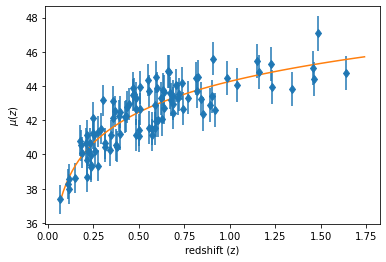

In [51]:
plt.errorbar(x_data, y_data, yerr=sigma, ls='', marker='d')
plt.plot(xarr, y_model)         
plt.xlabel('redshift (z)')
plt.ylabel(r'$\mu(z)$')

In [52]:
chi2 = np.sum(( (y_data-y_predict)/sigma)**2) 
p_value = scipy.stats.chi2.sf(chi2, df= len(x_data)-2) 
print('chi^2 = %.2f , for %i dof, namely a reduced chi2= %.2f' %(chi2, len(x_data)-(2), chi2/(len(x_data)-(2))))
print('p_value %.3e' % p_value)
print('Covariance matrix : \n', cov)

chi^2 = 98.24 , for 98 dof, namely a reduced chi2= 1.00
p_value 4.742e-01
Covariance matrix : 
 [[0.02227959 0.03901021]
 [0.03901021 0.11339396]]


Note that this model could have been linearized: $y = a + b * \log(x)$

**TBDONE** the following bit is a bit fishy. I need to find out why. 

In [20]:
logx_data = np.log(x_data)
p_model, cov = np.polyfit(logx_data, y_data, deg=1, w=wght, cov=True)
p_model

array([ 2.59350866, 44.26756373])

In [21]:
np.log(x_data).min(), np.log(x_data).max()

(-2.707550326060559, 0.4951229800386997)

Text(0, 0.5, '$\\mu(z)$')

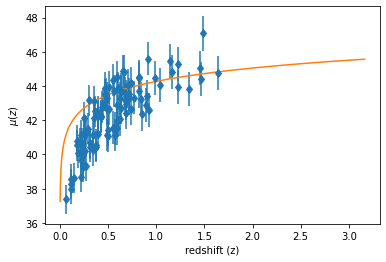

In [22]:
xarr = np.linspace(-2.7, 0.5, 100)
y_model = p_model[1] + p_model[0]*xarr
plt.errorbar(x_data, y_data, yerr=sigma, ls='', marker='d')
plt.plot(10**(xarr), y_model)         
plt.xlabel('redshift (z)')
plt.ylabel(r'$\mu(z)$')

#### Exercise

- Read the file "sinus_data.txt" and save its column into one (or multiple) arrays. The file contains 3 columns: theta, y, err_theta. Where theta is an angle (in radians). 
- Fit a model of the form $sin(a * \theta + b)$. 
- Print the model parameters and their uncertainties. 
- Estimate the quality of the fit
- Overplot the fitted model on the data 

TIP: If you do not reach a satistfactory fit, use the argument `p0` to set initial conditions of the parameters for the fit 

In [47]:
data = np.loadtxt('sinus_data.txt')

# Define a model 
def sinus(x, p1, p2):
    return np.sin(p1*x + p2)

p_model, cov = curve_fit(sinus, data[:,0], data[:,1], sigma=data[:,2], absolute_sigma=True, p0=[0.2, 0.3])

print('Covariance matrix : \n', cov )
for i in range(2): 
    print('param %i = %.2f +/- %.3f'%(i, p_model[i], np.sqrt(cov[i,i]) ))

Covariance matrix : 
 [[ 4.48581000e-07 -1.18232356e-05]
 [-1.18232356e-05  3.99261956e-04]]
param 0 = 0.20 +/- 0.001
param 1 = 0.89 +/- 0.020


chi^2 = 124.72 , for 98 dof, namely a reduced chi2= 1.27


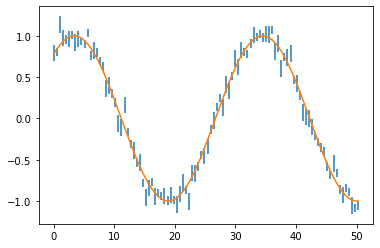

In [48]:
y_model = sinus(data[:,0], p_model[0], p_model[1])
y_predict = sinus(data[:,0],  p_model[0], p_model[1])

# Calculating the chi^2
chi2 = np.sum(( (data[:,1]-y_predict)/data[:,2])**2) 
print('chi^2 = %.2f , for %i dof, namely a reduced chi2= %.2f' %(chi2, len(data)-2, chi2/(len(data)-2)) )

plt.errorbar(data[:,0], data[:,1], yerr = data[:,2], ls = '')
plt.plot(data[:,0], y_model)

**Exercise: Covariance matrix error vs bootstrap**   

- Fit the logarithmic model used above to the supernova data and use the bootstrap technique to estimate the error bars on the fitted parameters.    
- Compare the bootstrap error to the one you derive using the covariance matrix.   
- Redo the procedure by artificially boosting the uncertainty of the supernovae data points: How do the covariance-matrix and bootstrap error change ? 

In [59]:
data = np.loadtxt('SNdata.txt')
x_data, y_data, sigma = data[:,0], data[:,1], data[:,2]
x_data = x_data 
wght = 1./sigma

def logmodel(x, p1, p2):
    return p1 + np.log10(x**p2) 

p_model_ref, cov_ref = curve_fit(logmodel, x_data, y_data, sigma=sigma, absolute_sigma=True)
print(p_model_ref, np.sqrt(cov_ref[0,0]), np.sqrt(cov_ref[1,1]))

x_mod = np.linspace(0,1.75)
y_mod = logmodel(x_mod,  *p_model_ref)

y_predict = logmodel(x_data,  *p_model_ref)
chi2 = np.sum(( (y_data-y_predict)/sigma)**2) 
print('chi2 value = ', chi2)

mu1_ref, sig1_ref = p_model_ref[0], np.sqrt(cov_ref[0,0])
mu2_ref, sig2_ref = p_model_ref[1], np.sqrt(cov_ref[1,1])

print(mu1_ref, sig1_ref )
print(mu2_ref, sig2_ref )

[44.26756375  5.97177443] 0.14926347739832596 0.3367402019820252
chi2 value =  98.23971271631191
44.26756374597933 0.14926347739832596
5.971774433478698 0.3367402019820252


/Users/dsluse/miniconda3/envs/py3_lectures/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


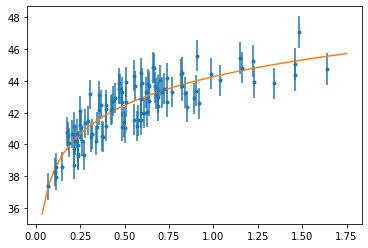

In [60]:
plt.errorbar(x_data, y_data, yerr=sigma, ls='', marker='.')
plt.plot(x_mod, y_mod)
sig1_ref, sig2_ref = np.sqrt(cov[0,0]), np.sqrt(cov[1,1])

Bootstrap error on p1, p2 0.14, 0.29
Covariance error on p1, p2 0.15, 0.34
Off diagonal term of covariance matrix: (bootstrap, fit) (0.030, 0.039)


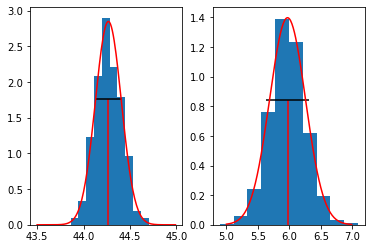

In [70]:
# Bootstraping

npts = len(x_data)
nboot = 1000

p1_boot = np.zeros(nboot)  # save parameters in an array 
p2_boot = np.zeros(nboot)

for i in range(nboot):
    bootsamp = np.random.randint(0, npts, npts)  # Generate random indices allowing replacement to create the bootsamp    
    x_boot, y_boot, sigboot = x_data[bootsamp], y_data[bootsamp], sigma[bootsamp]   # New bootstrap sample 
    p_model_boot, cov_boot = curve_fit(logmodel, x_boot, y_boot, sigma=sigboot, absolute_sigma=True)
    p1_boot[i], p2_boot[i] = p_model_boot[0], p_model_boot[1] 

mu1, sig1 = np.nanmean(p1_boot), np.nanstd(p1_boot, ddof=1)   # \hat{P1} and stde(p1)
mu2, sig2 = np.nanmean(p2_boot), np.nanstd(p2_boot, ddof=1)   # \hat{P2} and stde(p2)

sig12 = (1./nboot) * np.sum( (p1_boot - mu1) * (p2_boot - mu2) ) # off diagonal term of the covariance matrix 

f, ax = plt.subplots(ncols=2)
# P1 - left panel - Parameter 1 
h1 = ax[0].hist(p1_boot, bins=10, density=True)   # Bootstrap of p1

# Add vertical and horizontal lines corresponding to mean and stde(p1) from covariance matrix
ax[0].vlines(p_model_ref[0], 0, 0.606 * max(h1[0]), color='red')        # best model for p1 ; 1 sigma <=> 0.606 of max 
ax[0].hlines(0.606 * max(h1[0]), mu1_ref-sig1_ref, mu1_ref+sig1_ref, color='black')   # Errors on p1 from covariance matrix

# p2 - right pannel - Parameter 2 
h2 = ax[1].hist(p2_boot, bins=10, density=True)    # Bootstrap of p2

# Add vertical and horizontal lines corresponding to mean and stde(p1) from covariance matrix
ax[1].vlines(p_model_ref[1], 0, 0.606 * max(h2[0]), color='red')    # Best model p2
ax[1].hlines(0.606 * max(h2[0]), mu2_ref-sig2_ref, mu2_ref+sig2_ref, color='black')    # Errors on p2 from covariance matrix

g1, g2 = scipy.stats.norm(mu1, sig1), scipy.stats.norm(mu2, sig2)   # gaussian with bootstrap errors
x1, x2 = np.arange(43.5, 45, 0.01),np.arange(5, 7, 0.01) 
ax[0].plot(x1, g1.pdf(x1), color='red')
ax[1].plot(x2, g2.pdf(x2), color='red')

print('Bootstrap error on p1, p2 %.2f, %.2f' %(sig1, sig2))
print('Covariance error on p1, p2 %.2f, %.2f' %(sig1_ref, sig2_ref))
print('Off diagonal term of covariance matrix: (bootstrap, fit) (%.3f, %.3f)' %(sig12, cov_ref[0,1]))

In [71]:
# Let's artificially increase the sigma 
p_model_ref2, cov_ref2 = curve_fit(logmodel, x_data, y_data, sigma=2*sigma, absolute_sigma=True)
print(p_model_ref2, np.sqrt(cov_ref2[0,0]), np.sqrt(cov_ref2[1,1]))
mu1_ref2, sig1_ref2 = p_model_ref2[0], np.sqrt(cov_ref2[0,0])
mu2_ref2, sig2_ref2 = p_model_ref2[1], np.sqrt(cov_ref2[1,1])

[44.26756375  5.97177443] 0.2985269547966519 0.6734804039640504


Bootstrap error on p1, p2 0.14, 0.29
Covariance error on p1, p2 0.30, 0.67
Off diagonal term of covariance matrix: (bootstrap, fit) (0.029, 0.156)


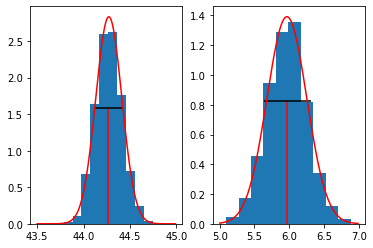

In [73]:
p1_boot = np.zeros(nboot)  # save parameters in an array 
p2_boot = np.zeros(nboot)

for i in range(nboot):
    bootsamp = np.random.randint(0, npts, npts)  # Generate random indices allowing replacement to create the bootsamp    
    x_boot, y_boot, sigboot = x_data[bootsamp], y_data[bootsamp], sigma[bootsamp]   # New bootstrap sample 
    p_model_boot, cov_boot = curve_fit(logmodel, x_boot, y_boot, sigma=sigboot, absolute_sigma=True)
    p1_boot[i], p2_boot[i] = p_model_boot[0], p_model_boot[1] 

mu1, sig1 = np.nanmean(p1_boot), np.nanstd(p1_boot, ddof=1)   # \hat{P1} and stde(p1)
mu2, sig2 = np.nanmean(p2_boot), np.nanstd(p2_boot, ddof=1)   # \hat{P2} and stde(p2)

sig12 = (1./nboot) * np.sum( (p1_boot - mu1) * (p2_boot - mu2) ) # off diagonal term of the covariance matrix 

f, ax = plt.subplots(ncols=2)
# P1 - left panel - Parameter 1 
h1 = ax[0].hist(p1_boot, bins=10, density=True)   # Bootstrap of p1

# Add vertical and horizontal lines corresponding to mean and stde(p1) from covariance matrix
ax[0].vlines(p_model_ref[0], 0, 0.606 * max(h1[0]), color='red')        # best model for p1 ; 1 sigma <=> 0.606 of max 
ax[0].hlines(0.606 * max(h1[0]), mu1_ref-sig1_ref, mu1_ref+sig1_ref, color='black')   # Errors on p1 from covariance matrix

# p2 - right pannel - Parameter 2 
h2 = ax[1].hist(p2_boot, bins=10, density=True)    # Bootstrap of p2

# Add vertical and horizontal lines corresponding to mean and stde(p1) from covariance matrix
ax[1].vlines(p_model_ref[1], 0, 0.606 * max(h2[0]), color='red')    # Best model p2
ax[1].hlines(0.606 * max(h2[0]), mu2_ref-sig2_ref, mu2_ref+sig2_ref, color='black')    # Errors on p2 from covariance matrix

g1, g2 = scipy.stats.norm(mu1, sig1), scipy.stats.norm(mu2, sig2)   # gaussian with bootstrap errors
x1, x2 = np.arange(43.5, 45, 0.01),np.arange(5, 7, 0.01) 
ax[0].plot(x1, g1.pdf(x1), color='red')
ax[1].plot(x2, g2.pdf(x2), color='red')

print('Bootstrap error on p1, p2 %.2f, %.2f' %(sig1, sig2))
print('Covariance error on p1, p2 %.2f, %.2f' %(sig1_ref2, sig2_ref2))
print('Off diagonal term of covariance matrix: (bootstrap, fit) (%.3f, %.3f)' %(sig12, cov_ref2[0,1]))

Because it is based on intrinsic scatter / noise in data, bootstrap will provide errors that are less sensitive to the good knowledge of the noise (the noise is encoded into the scatter between the data). My bootstrap estimate of the stde does not change while the results I get from the covariance matrix do change.

### IV.4 What if we have outliers, errors in $x$ and $y$, models with more parameters than data ?

There is "receipes" in the frequentist cookbook (see e.g. Numerical receipes) to address those problems, but Bayesian approaches provide sound and well motivated methodologies to deal with those situations ... provided you accept the Bayesian way to see data and models. 
Hence, you'll have to wait that we approach Bayesian statistical inference to have answer to those questions. 

In [35]:
import statsmodels.api as sm

In [36]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x ** 2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [37]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

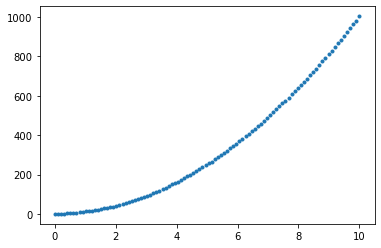

In [38]:
plt.scatter(x, y, marker='.')

In [39]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.556e+06
Date:                Mon, 15 Nov 2021   Prob (F-statistic):          1.42e-249
Time:                        12:44:33   Log-Likelihood:                -122.09
No. Observations:                 100   AIC:                             250.2
Df Residuals:                      97   BIC:                             258.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1676      0.245      4.766      0.0

### IV.5 Summary of python tools for regression

This summary is not exhaustive and only includes those regression techniques we have discussed above. 


| Model | Package | Comments  | 
|-------|---------|--------|
|Linear  | `np.polyfit()` | $y=f(x)$ but can fit same model on multiple (k) data sets; weights = $1/\sigma$ |
|Linear  | `sklearn.linear_model.LinearRegression()` | $y = f(x_1, ..., x_n)$; weights = $1/\sigma$ |
|Linear + regularization | `sklearn.linear_model.Ridge()` | $\sum \theta_p^2 < s$; `RidgeCV()` implements cross validation for getting best $\lambda$|
|Linear + regularization | `sklearn.linear_model.Lasso()` | $\sum |\theta_p| < s$; `LassoCV()` implements cross validation for getting best $\lambda$|
|Non Linear | `scipy.optimize.curve_fit()` | Uses Levenberg marquardt for optimization; sigma = $\sigma$, do not forget arg. `absolute_sigma = True`|
|Non Linear | `astropy.modeling()` | Under active development ; Well suited to fit variety of 2D models (e.g. $z=f(x,y)$ - PSF/galaxy model on an image)| 
|Non Linear | [`lmfit`](http://cars9.uchicago.edu/software/python/lmfit/index.html) | High level interface to Levenberg Marquardt optimization; allows bounds on parameters| 

The module `statsmodels` (see https://www.statsmodels.org/stable/index.html ) provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests and performing regressions. Once regression is perfomed on data, it also systematically calculates various quantities or performs various tests allowing to quantify the quality of your model(ing). Researchers familiar with `R` will recognise features available when performing statistical analyses with that language. `Pandas dataframes` are the prefered data format but `numpy arrays` can also be used. See also the following webpage http://scipy-lectures.org/packages/statistics/index.html#formulas-to-specify-statistical-models-in-python to understand how data, models, and variables (the `y` variable in `statsmodels` is called *endogenous* while the `x` variable is called *exogenous*) are defined with `statsmodels`. 

Here is an example of `statsmodels` output for an ordinary least-square regression: 

<img src="../Figures/Statsmodels_example.png" alt="Statsmodels_example.png" style="width: 800px;"/>

## Summary 

- The likelihood of data, given model parameters, is defined as $L \equiv P(D \,|\, M(\theta))$. 
- The point-estimators used in classical (frequentists) are in general estimators that maximize the likelihood, and are therefore called "Maximum Likelihood Estimators". 
- For random variables that follow a normal distribution $N(\mu, \sigma)$, the likelihood is given as: 

$$
L \equiv p(\{x_i\} | \mu, \sigma ) = \frac{1}{\sigma^n (2\,\pi)^{n/2}} \exp \left ( \sum_{i=1}^N \frac{-(x_i - \mu)^2}{2\, \sigma^2} \right)
$$
- Regression of a model $y(x)$ through data points $D={(x_i, y_i)}$ is generally performed by minimizing a merit function of the form: 

$$
\chi^2 \equiv \sum \frac{(y_i - y^{\rm{mod}}_i)^2}{\sigma^2_i}
$$

- In addition we have the following: 
  - Minimizing the above merit function is called a $\chi^2$ regression. The $\chi^2$ merit function follows a $\chi^2$ distribution with $\nu$ degrees of freedom, where the number of degrees of freedom is given by the difference between the number of data points and the number of parameters of the model. 
  - When the uncertainties $\sigma_i = 1$ for all the data points, one speaks of a "least-square" regression. 
  - One defines the reduced $\chi^2_{\rm red} = \chi^2 / \nu$. In the case where the model represents well the data , a $\chi^2_{\rm red} \sim 1$ is expected (as $\nu$ is the expectation value of the chi-2 distribution). 
  - The quality of the regression can be evaluated based on the comparison of the obtained $\chi^2$ and its expectation value (from the chi-2 distribution). This can be summarized by calculating a p-value which is $p \equiv 1-\rm{CDF}(\rm{chi2}(\nu))$, where $\nu$ is the number of degrees of freedom of the chi-2 distribution.  
  - The model parameters inferred through a regression, are parameters that maximize the likelihood. 
 
- The likelihood for gaussian uncertainties is proportional to $\exp(-\chi^2/2)$ 
- A regression model is said *linear* if it is linear in its model parameters. In this case, there is an exact solution resulting from matrix inversion and multiplications, involving the data and their uncertainties (through a covariance matrix). 
- A regression model is *not linear* if it is **not** linear in its parameters. In that case, a numerical algorithm is needed to find the best model parameters. 
- A non exhaustive list of python tools usable for regression is provided in Sect. [IV.5](#IV.5-Summary-of-python-tools-for-regression)

## XX. References and supplementary material: <a class="anchor" id="X"></a>

**Chapter** (4.5, 4.7), **Chapter 8** (8.1, 8.2, 8.7) of the book <a class="anchor" id="book"></a> *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy. 

* $\chi^2$ and linear fits, Andy Gould, https://arxiv.org/abs/astro-ph/0310577

* Optimization in python (a rather complete reference): http://people.duke.edu/~ccc14/sta-663-2018/notebooks/S09D_Optimization_Examples.html

* *All of statistics: a concise course in statistical inference*, Wasserman 2004  <a class="anchor" id="WAS04"></a> (see also errata in http://www.stat.cmu.edu/~larry/all-of-statistics/ ): **Chapter 8, 9**

* *Statistics in theory and Practice*, Lupton 1993 <a class="anchor" id="LUP93"></a>: **Chapter 6, 7, 8, 9**

* [Numerical recipes](http://www2.units.it/ipl/students_area/imm2/files/Numerical_Recipes.pdf) by Press et al. Cambridge University press: **Chapter 15**

Other useful references to know more about the topics covered in this class: 

- Sklearn help: http://scikit-learn.org/stable/modules/linear_model.html

- Guide on General Least Square regression by Paul Johnson: http://pj.freefaculty.org/guides/stat/Regression/GLS/GLS-1-guide.pdf

- Contribution of Fisher to MLE: J.A. Aldrich R. A. Fisher and the Making of Maximum Likelihood 1912– 1922 About Fisher's invention of Maximum Likelihood: Statistical science, 1997, 12, 3, 162 https://projecteuclid.org/download/pdf_1/euclid.ss/1030037906 

